In [1]:
# 1. 统计nprobe变换时达到90%召回的query数目
# 2. query的topk所在桶的分布

In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [49]:
f = h5py.File('/home/dataset/gist/gist-960-euclidean.hdf5')

In [45]:
gt = f['neighbors']

In [46]:
# topk distribution
def topk_dist(query, bucket_path = "/tmp/test_pag_gist/bucket_111.txt"):
  gt_i = list(gt[query][:10])
  topk_index = [[] for _ in range(len(gt_i))]
  fb = open(bucket_path, "r")
  lines = list(reversed(fb.readlines()))
  for i in range(len(lines)):
    line = lines[i]
    line_split = line.split(' ')[:-1]
    line_content = [int(i) for i in line_split]
    # print(line_content)
    # break
    # print(line_content)
    for j in range(len(gt_i)):
      # print(gt_i[j])
      if line_content.count(gt_i[j]) > 0:
        topk_index[j].append(i)
    # break
  fb.close()
  return topk_index

In [47]:
data = topk_dist(111)

In [48]:
data

[[], [], [], [], [], [], [], [268], [], []]

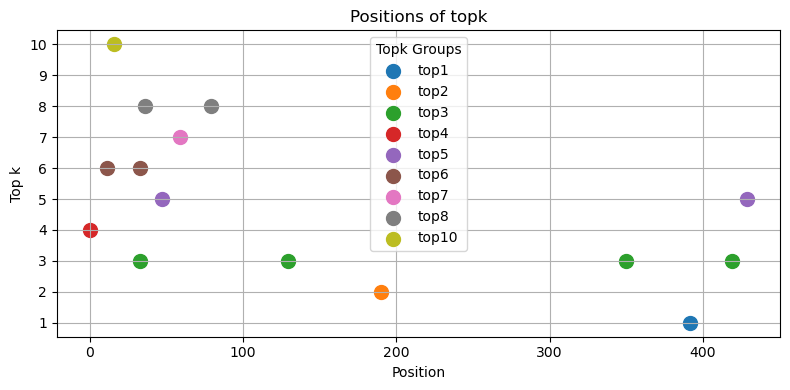

In [36]:
fig, ax = plt.subplots(figsize=(8, 4))
for i, positions in enumerate(data):
    # 这里 topk 的编号从 1 开始，即 top1, top2, ...
    y = [i + 1] * len(positions)
    if positions:  # 如果该列表不为空，则绘制对应的点
        ax.scatter(positions, y, s=100, label=f"top{i + 1}")

# 设置坐标轴标签和标题
ax.set_xlabel("Position")
ax.set_ylabel("Top k")
ax.set_title("Positions of topk")
ax.set_yticks(range(1, len(data) + 1))  # Y 轴显示各 topk 的编号
ax.grid(True)

# 如果希望显示图例，可以取消下面代码的注释
ax.legend(title="Topk Groups")

plt.tight_layout()
plt.show()